In [180]:
import pandas as pd,numpy as np

In [181]:
inp0 = pd.read_csv('googleplaystore_v2.csv')
inp0.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [182]:
inp0.shape

(10841, 13)

In [183]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [184]:
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [185]:
#data cleaning, handling missing values for rating. Because rating is the target variable and it has a lot of missing, so its better to drop them

inp1=inp0[~inp0.Rating.isnull()]
inp1



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [186]:
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [187]:
#exploring android ver column
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [188]:
#lets drop the index 10472
inp1=inp1[~(inp1['Android Ver'].isnull() & (inp1.Category == "1.9"))]

In [189]:
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [190]:
#we can replace the remaining missing values with the most recurring value
inp1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
7.0 - 7.1.1              1
5.0 - 6.0                1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [191]:
inp1['Android Ver'].mode(0)

0    4.1 and up
dtype: object

In [192]:
inp1['Android Ver']= inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

<ipython-input-192-4676335b3df0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Android Ver']= inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])


In [193]:
inp1['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
7.0 - 7.1.1              1
5.0 - 6.0                1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [194]:
inp1['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.19.0.201907232         1
4.11.0                   1
3.115.27                 1
1.8.0.4                  1
12.2                     1
Name: Current Ver, Length: 2638, dtype: int64

In [195]:
inp1[inp1['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [196]:
inp1['Current Ver']=inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

<ipython-input-196-84aaf49884ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Current Ver']=inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])


In [197]:
inp1['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.19.0.201907232         1
4.11.0                   1
3.115.27                 1
1.8.0.4                  1
12.2                     1
Name: Current Ver, Length: 2638, dtype: int64

In [198]:
#changing the variables to correct type

inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [199]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [200]:
inp1.Price.value_counts()

0         8719
$2.99      114
$0.99      107
$4.99       70
$1.99       59
          ... 
$2.50        1
$14.00       1
$15.99       1
$13.99       1
$3.90        1
Name: Price, Length: 73, dtype: int64

In [201]:
#removing $ from the values of price
inp1['Price']=inp1.Price.apply(lambda x: 0 if x=="0" else float(x[1:]))

<ipython-input-201-d096da86c0ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Price']=inp1.Price.apply(lambda x: 0 if x=="0" else float(x[1:]))


In [202]:
inp1.Price.dtypes

dtype('float64')

In [203]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [204]:
inp1.Reviews.value_counts()

2         83
3         78
5         74
4         74
1         67
          ..
454060     1
12495      1
199808     1
21336      1
63580      1
Name: Reviews, Length: 5992, dtype: int64

In [205]:
inp1.Reviews= inp1.Reviews.astype("int32")

F:\Users\Hello\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [206]:
inp1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [207]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [208]:
inp1.Installs.value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [209]:
inp1['Installs']=inp1.Installs.apply(lambda x: x.replace(',',''))
inp1['Installs']=inp1.Installs.apply(lambda x: x.replace('+',''))
inp1['Installs']=inp1.Installs.astype("int32")


<ipython-input-209-5d123e7a4650>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Installs']=inp1.Installs.apply(lambda x: x.replace(',',''))
<ipython-input-209-5d123e7a4650>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Installs']=inp1.Installs.apply(lambda x: x.replace('+',''))
<ipython-input-209-5d123e7a4650>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [210]:
inp1.Installs.value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [211]:
### Sanity Checks
inp1.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [212]:
#Reviews should be <= installs
inp1[(inp1.Reviews>inp1.Installs)].shape

(7, 13)

In [213]:
inp1[(inp1.Reviews>inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [214]:
inp1=inp1[inp1.Reviews<=inp1.Installs]

In [215]:
#for free apps the price should not be more than 0
inp1[inp1.Type=='Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [216]:
#identifying and handling outliers/extreme values

In [217]:
import matplotlib.pyplot as plt

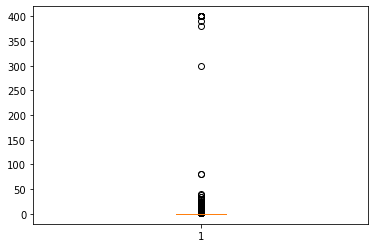

In [218]:
plt.boxplot(inp1.Price)
plt.show()

In [219]:
inp1[inp1.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [220]:
inp1=inp1[inp1.Price<200]

In [221]:
inp1.describe()

,Rating,Reviews,Size,Installs,Price
count,9344.000000,9.344000e+03,9344.000000,9.344000e+03,9344.000000
mean,4.191695,5.152581e+05,22732.932449,1.793956e+07,0.334463
std,0.515004,3.147643e+06,21316.475007,9.134144e+07,2.169925
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.880000e+02,6600.000000,1.000000e+04,0.000000
50%,4.300000,5.998500e+03,21000.000000,5.000000e+05,0.000000
75%,4.500000,8.222650e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,79.990000


<AxesSubplot:>

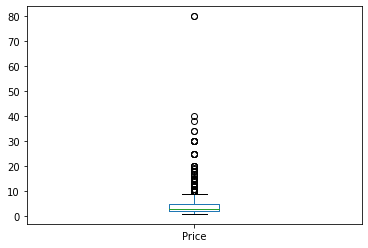

In [222]:
inp1[inp1.Price>0].Price.plot.box()

In [223]:
inp1[inp1.Price>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [224]:
inp1=inp1[inp1.Price<=30]

In [225]:
inp1.shape

(9338, 13)

<AxesSubplot:>

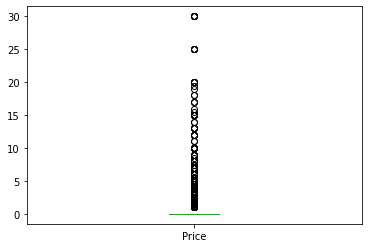

In [226]:
inp1['Price'].plot.box()

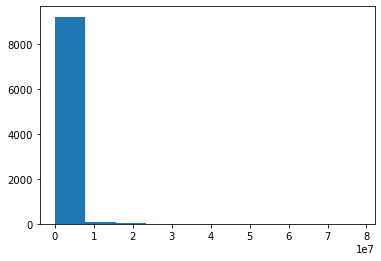

In [227]:
plt.hist(inp1.Reviews)
plt.show()

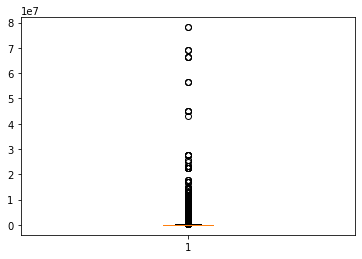

In [228]:
plt.boxplot(inp1.Reviews)
plt.show()

In [229]:
inp1[inp1.Reviews>=10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [236]:
#removing records with more than 1M reviews as they are of no use to our study

inp1=inp1[inp1['Reviews'] <= 1000000]


In [237]:
inp1.shape

(8634, 13)

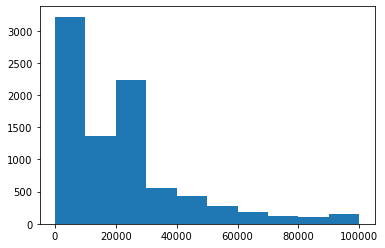

In [243]:
plt.hist(inp1.Size)
plt.show()

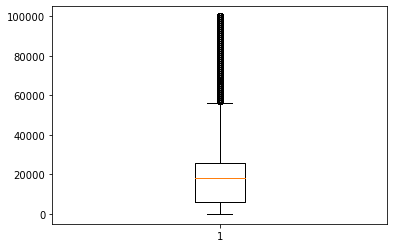

In [244]:
plt.boxplot(inp1.Size)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:ylabel='Frequency'>

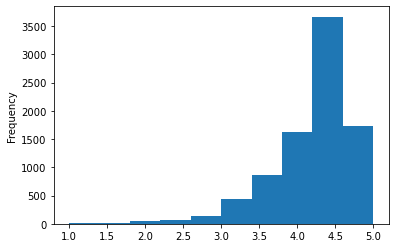

In [245]:
##Distribution of the ratings
inp1.Rating.plot.hist()

In [246]:
import seaborn as sns

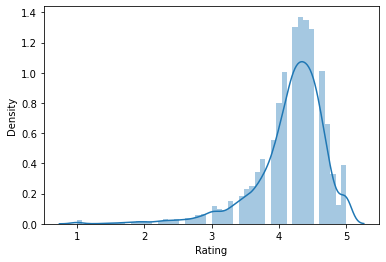

In [247]:
sns.distplot(inp1.Rating)
plt.show()

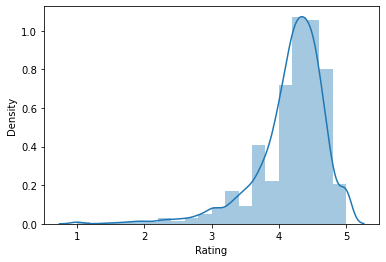

In [248]:
sns.distplot(inp1.Rating,bins=20)
plt.show()

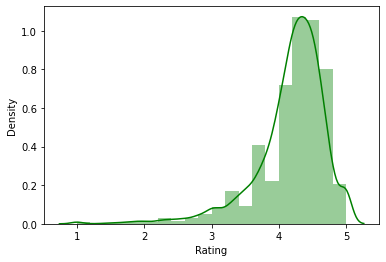

In [249]:
sns.distplot(inp1.Rating,bins=20,color="g")

plt.show()

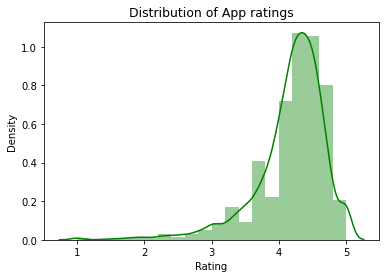

In [250]:
sns.distplot(inp1.Rating,bins=20,color="g")
plt.title("Distribution of App ratings",fontsize=12.5)
plt.show()

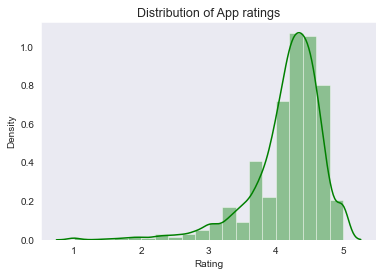

In [251]:
sns.set_style("dark")
sns.distplot(inp1.Rating,bins=20,color="g")
plt.title("Distribution of App ratings",fontsize=12.5)
plt.show()

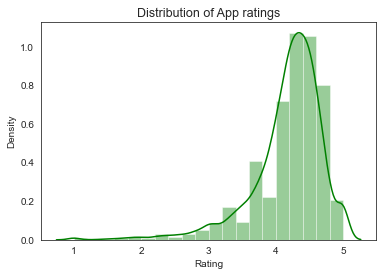

In [252]:
sns.set_style("white")
sns.distplot(inp1.Rating,bins=20,color="g")
plt.title("Distribution of App ratings",fontsize=12.5)
plt.show()

In [253]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [254]:
plt.style.use("tableau-colorblind10")

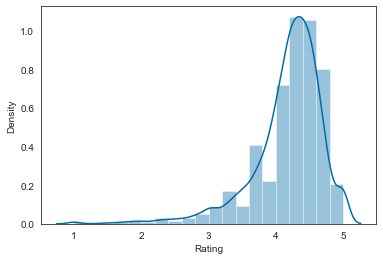

In [255]:
sns.distplot(inp1.Rating, bins=20)
plt.show()

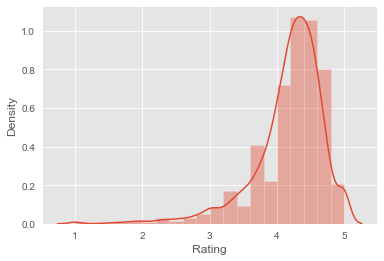

In [256]:
plt.style.use("ggplot")
sns.distplot(inp1.Rating, bins=20)
plt.show()

Everyone           6943
Teen                933
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [266]:
inp1=inp1[~inp1['Content Rating'].isin(["Adults only 18+","Unrated"])]

In [267]:
inp1.shape

(8630, 13)

In [268]:
inp1['Content Rating'].value_counts()

Everyone        6943
Teen             933
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

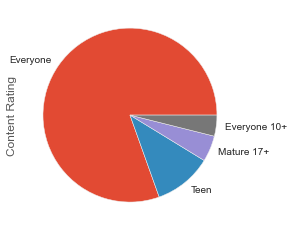

In [269]:
inp1['Content Rating'].value_counts().plot.pie()
plt.show()

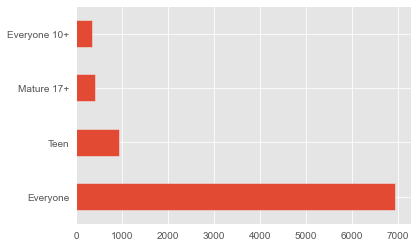

In [271]:
inp1['Content Rating'].value_counts().plot.barh()
plt.show()

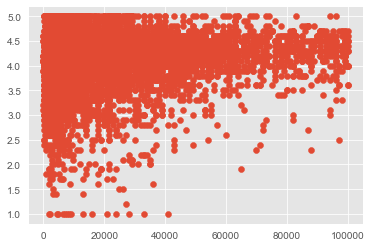

In [272]:
plt.scatter(inp1.Size,inp1.Rating)
plt.show()

In [273]:
sns.set_style("white")

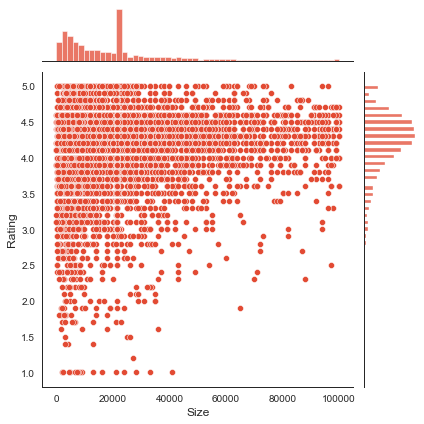

In [275]:
sns.jointplot(inp1.Size,inp1.Rating)
plt.show()

In [276]:
#it seems like the heavier the app is, it gets rated more

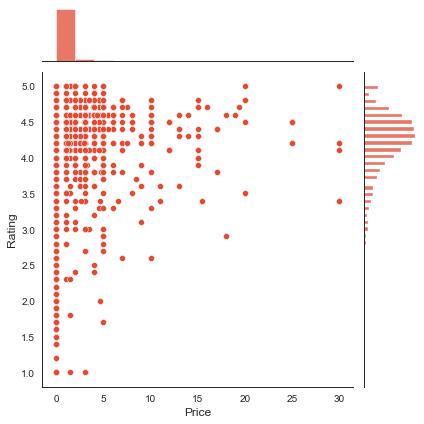

In [277]:
#Ratings vs Price
sns.jointplot(inp1.Price,inp1.Rating)
plt.show()

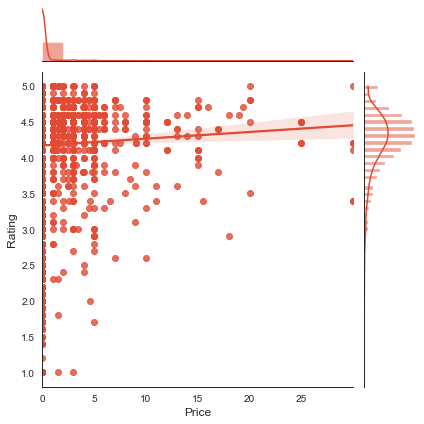

In [278]:
sns.jointplot(inp1.Price,inp1.Rating,kind="reg")
plt.show()

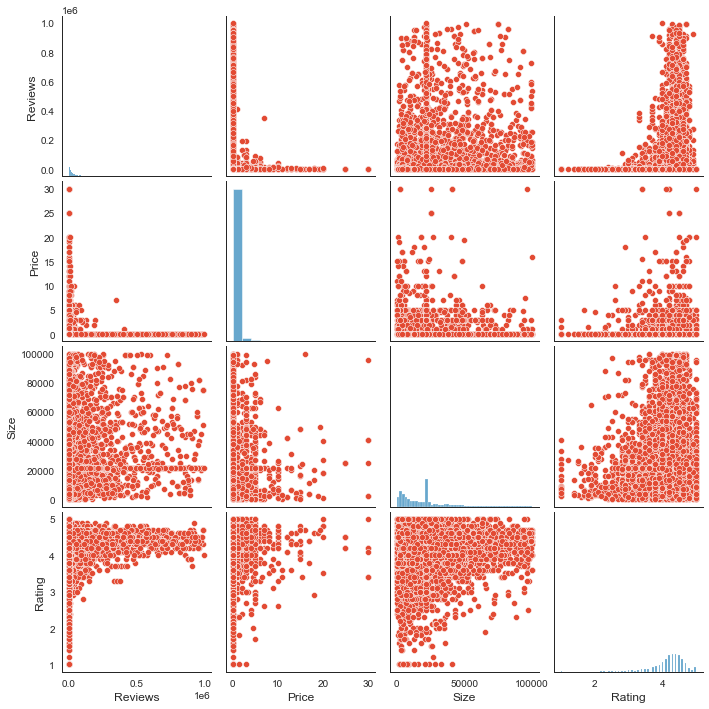

In [282]:
#looking at all numeric columns together
sns.pairplot(inp1[["Reviews","Price","Size","Rating"]])
plt.show()

<AxesSubplot:xlabel='Content Rating'>

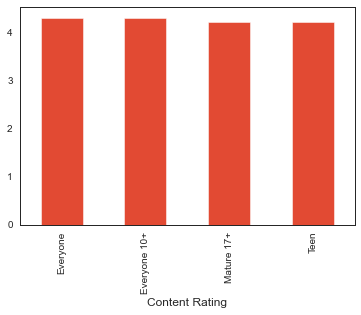

In [283]:
inp1.groupby(["Content Rating"])['Rating'].median().plot.bar()

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

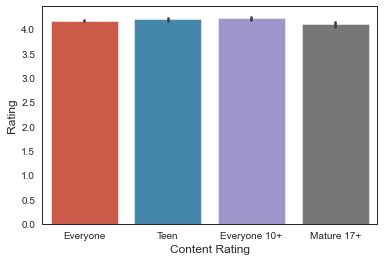

In [284]:
sns.barplot(data=inp1,x='Content Rating',y='Rating')

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

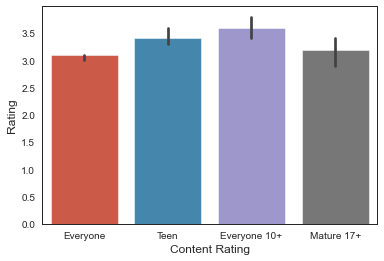

In [285]:
sns.barplot(data=inp1,x='Content Rating',y='Rating', estimator=lambda x:np.quantile(x,0.05))

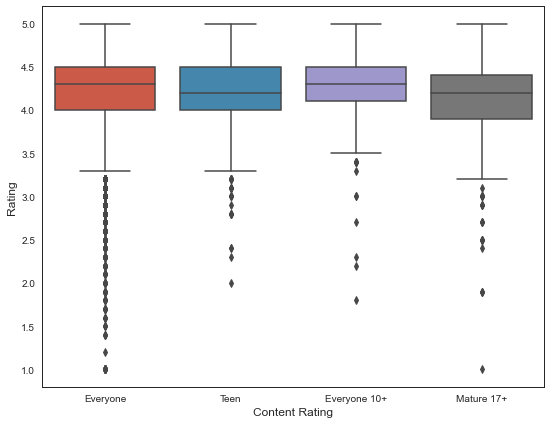

In [286]:
plt.figure(figsize=[9,7])
sns.boxplot(inp1['Content Rating'],inp1.Rating)
plt.show()

In [287]:
#for 3 variables use heat map
pd.qcut(inp1.Size,[0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])

0         M
1         M
2         L
3         H
4        VL
         ..
10834    VL
10836    VH
10837    VL
10839     M
10840     M
Name: Size, Length: 8630, dtype: category
Categories (5, object): ['VL' < 'L' < 'M' < 'H' < 'VH']

In [292]:
inp1['Size_Bucket']= pd.qcut(inp1.Size,[0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])

In [293]:
?pd.qcut

In [294]:
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating")

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.117536,4.158405,4.215699,4.170799,4.187396
Everyone 10+,4.189474,4.207407,4.238318,4.193443,4.217073
Mature 17+,3.978947,4.124211,4.021705,4.155172,4.193814
Teen,4.184848,4.233094,4.138408,4.198131,4.246154


In [295]:
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating", aggfunc=np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.25,4.2,4.1,4.1,4.2
Teen,4.20,4.3,4.2,4.2,4.3


In [299]:
pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating", aggfunc=lambda x:np.quantile(x,0.2))

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


In [300]:
res=pd.pivot_table(data=inp1,index="Content Rating",columns="Size_Bucket",values="Rating", aggfunc=lambda x:np.quantile(x,0.2))

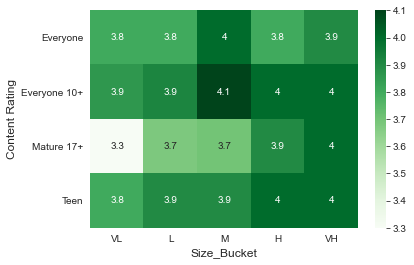

In [302]:
sns.heatmap(res, cmap="Greens", annot=True)
plt.show()

In [304]:
inp1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int32
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
dtype: object

In [306]:
inp1['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [312]:
inp1['Updated month']=pd.to_datetime(inp1['Last Updated']).dt.month

In [313]:
inp1.groupby(['Updated month'])['Rating'].mean()

Updated month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153308
6     4.172590
7     4.222999
8     4.269286
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Updated month'>

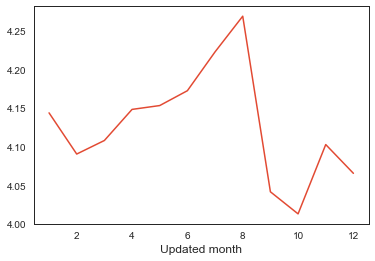

In [314]:
inp1.groupby(['Updated month'])['Rating'].mean().plot()

In [317]:
monthly=pd.pivot_table(data=inp1, values="Installs",index="Updated month",columns="Content Rating", aggfunc=sum)

In [318]:
monthly


Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated month,,,,
1,9.253874e+08,105282000.0,9701210.0,4.415901e+07
2,5.453720e+08,19821000.0,13021500.0,3.959771e+07
3,6.953655e+08,30322510.0,9111100.0,7.985031e+07
4,9.733712e+08,23300000.0,5259000.0,1.616194e+08
5,2.361068e+09,118173500.0,50140100.0,2.026896e+08
6,2.427171e+09,317727100.0,145257200.0,4.157166e+08
7,8.271110e+09,456556000.0,419491910.0,1.943557e+09
8,7.430943e+09,215821000.0,312981700.0,6.257856e+09
9,2.603404e+08,24931100.0,2201010.0,2.248310e+07


<AxesSubplot:xlabel='Updated month'>

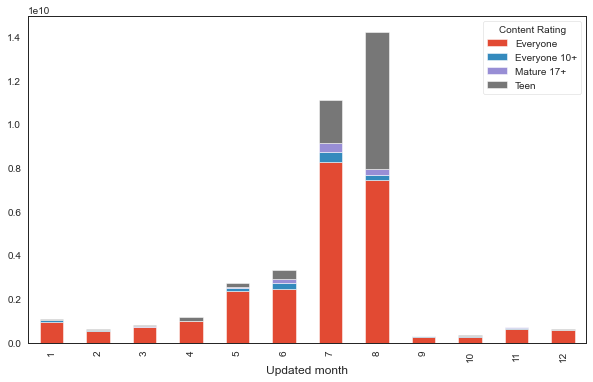

In [319]:
monthly.plot(kind="bar",stacked="True",figsize=[10,6])

In [323]:
#Get proportions/perc instead of absolute vlaues
monthly_perc=monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x: x/x.sum(), axis=1)

<AxesSubplot:xlabel='Updated month'>

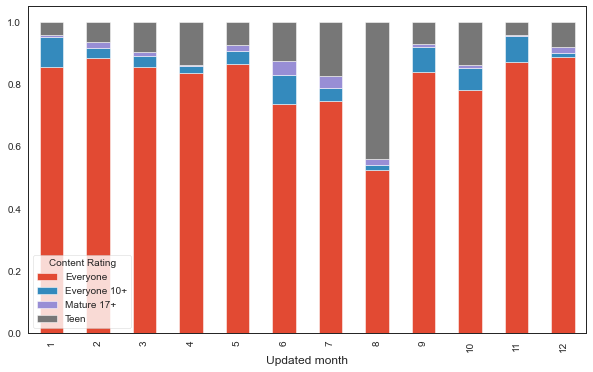

In [324]:
monthly_perc.plot(kind="bar",stacked="True",figsize=[10,6])